In [1]:
import pandas as pd
import numpy as np
import csv

In [2]:
df = pd.read_csv("GR_Goodlato Full Data(cleansed).xlsx - Sheet1.csv")
df['comments_cleansed'] = df['comments_cleansed'].str.replace('\n', '')
df2 = df[["comments_cleansed", "Community Member"]]

In [3]:
df

,Commentor,No_of_comment,comment_on,comments,comments_cleansed,Community Member
0,Jessli Lee,3 reviews,a month ago,Owner was friendly. Cafe vibes was pleasant. T...,owner was friendly cafe vibes was pleasant tri...,NaN
1,JY Yong,4 reviews,a month ago,Felt cheated.. won a prize from them that is v...,felt cheated won a prize from them that is val...,NaN
2,benedict chen,· 10 reviews,2 months ago,Yummy ube ice cream rich ube flavour sweetnes...,yummy ube ice cream rich ube flavour sweetness...,Local Guide
3,Ronnie Lim,5 reviews,2 months ago,First lick of the scoop and it immediately mad...,first lick of the scoop and it immediately mad...,NaN
4,Denise Ong,28 reviews,3 months ago,Pretty good gelato in the clarke quay area! In...,pretty good gelato in the clarke quay area int...,NaN
...,...,...,...,...,...,...
85,Benjamin Lim,2 reviews,a year ago,Owner is very friendly and a pleasure to talk ...,owner is very friendly and a pleasure to talk ...,NaN
86,Rika Ogawa,1 review,a year ago,The Ube flavour was unique and creamy. Would r...,the ube flavour was unique and creamy would re...,NaN
87,Leanne teh,2 reviews,a year ago,Love the flavours!! Super intense yet creamy. ...,love the flavours super intense yet creamy if ...,NaN
88,Yamin Aung,1 review,a year ago,Saw quite a few people outside the shop so gav...,saw quite a few people outside the shop so gav...,NaN


In [4]:
df2

,comments_cleansed,Community Member
0,owner was friendly cafe vibes was pleasant tri...,NaN
1,felt cheated won a prize from them that is val...,NaN
2,yummy ube ice cream rich ube flavour sweetness...,Local Guide
3,first lick of the scoop and it immediately mad...,NaN
4,pretty good gelato in the clarke quay area int...,NaN
...,...,...
85,owner is very friendly and a pleasure to talk ...,NaN
86,the ube flavour was unique and creamy would re...,NaN
87,love the flavours super intense yet creamy if ...,NaN
88,saw quite a few people outside the shop so gav...,NaN


## Pre-processing

In [5]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
import re

nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

porter = PorterStemmer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [6]:
# Drop if empty
df2.dropna(subset=['comments_cleansed'], inplace=True)

<ipython-input-6-4f9c45ac7445>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(subset=['comments_cleansed'], inplace=True)


In [7]:
def preprocess_text(text):
    text = text.lower()
    words = word_tokenize(text)

    # Remove stopwords, perform stemming, and handle contractions
    filtered_words = [porter.stem(word) for word in words if word.lower() not in stop_words]

    # Join the words back into a string
    processed_text = ' '.join(filtered_words)

    # Handle contractions (expanding them)
    processed_text = expand_contractions(processed_text)

    return processed_text

# Function to expand contractions
def expand_contractions(text):
    # Dictionary of common contractions and their expansions
    contractions_dict = {
        "can't": "cannot",
        "n't": "not",
        "'ve": "have",
        "'ll": "will",
        "'re": "are",
        "'d": "would",
        "'s": "is",
        "'m": "am"
    }
    # Regular expression pattern to match contractions
    contractions_pattern = re.compile('({})'.format('|'.join(contractions_dict.keys())),
                                      flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        expanded_contraction = contractions_dict.get(match) if contractions_dict.get(match) else contractions_dict.get(match.lower())
        return expanded_contraction

    expanded_text = contractions_pattern.sub(expand_match, text)
    return expanded_text

In [8]:
# Remove Stop Words
def remove_stopwords(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

df2['comments_cleansed'] = df2['comments_cleansed'].apply(remove_stopwords)

<ipython-input-8-554f2e185a5e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['comments_cleansed'] = df2['comments_cleansed'].apply(remove_stopwords)


## Sentiment Analysis

In [9]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [10]:
def get_sentiment_scores(text):
    # Get the sentiment scores using VADER
    scores = sid.polarity_scores(text)
    return scores

In [11]:
df2['sentiment_scores'] = df2['comments_cleansed'].apply(get_sentiment_scores)
df2['compound_sentiment'] = df2['sentiment_scores'].apply(lambda x: x['compound'])

<ipython-input-11-ad28bba6924b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sentiment_scores'] = df2['comments_cleansed'].apply(get_sentiment_scores)
<ipython-input-11-ad28bba6924b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['compound_sentiment'] = df2['sentiment_scores'].apply(lambda x: x['compound'])


In [12]:
# Classify based on compound score
def classify_sentiment(compound_score):
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [13]:
# Apply sentiment classification
df2['sentiment'] = df2['compound_sentiment'].apply(classify_sentiment)

# Print the updated DataFrame with sentiment analysis results
print(df2[['comments_cleansed', 'compound_sentiment', 'sentiment']])

                                    comments_cleansed  compound_sentiment  \
0   owner friendly cafe vibes pleasant tried speci...              0.9432   
1   felt cheated prize valued 100 expiry september...              0.4951   
2   yummy ube ice cream rich ube flavour sweetness...              0.8807   
3   first lick scoop immediately made fall dispell...              0.1531   
4   pretty good gelato clarke quay area interestin...              0.9510   
..                                                ...                 ...   
85  owner friendly pleasure talk sampled ube earl ...              0.9644   
86  ube flavour unique creamy would recommend anyo...              0.9848   
87  love flavours super intense yet creamy chocola...              0.9823   
88  saw quite people outside shop gave try new gel...              0.8082   
89  delicious ice cream added benefit low calorie ...              0.8316   

   sentiment  
0   positive  
1   positive  
2   positive  
3   positive  


<ipython-input-13-f89bd7e3ff47>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['sentiment'] = df2['compound_sentiment'].apply(classify_sentiment)


### Plot

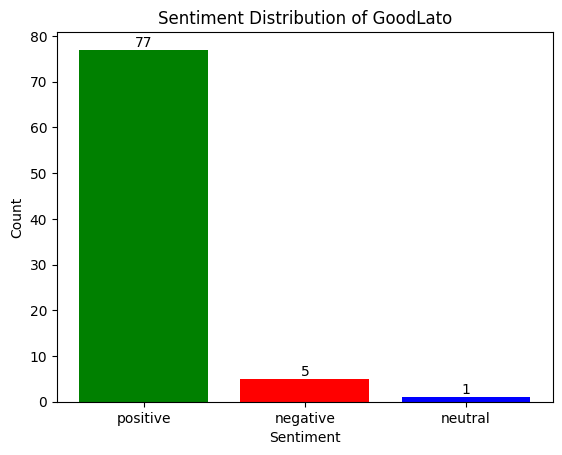

In [14]:
import matplotlib.pyplot as plt

# Count the occurrences of each sentiment
sentiment_counts = df2['sentiment'].value_counts()

# Plot the sentiment distribution
plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'red', 'blue'])
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution of GoodLato')

for index, value in enumerate(sentiment_counts.values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.show()

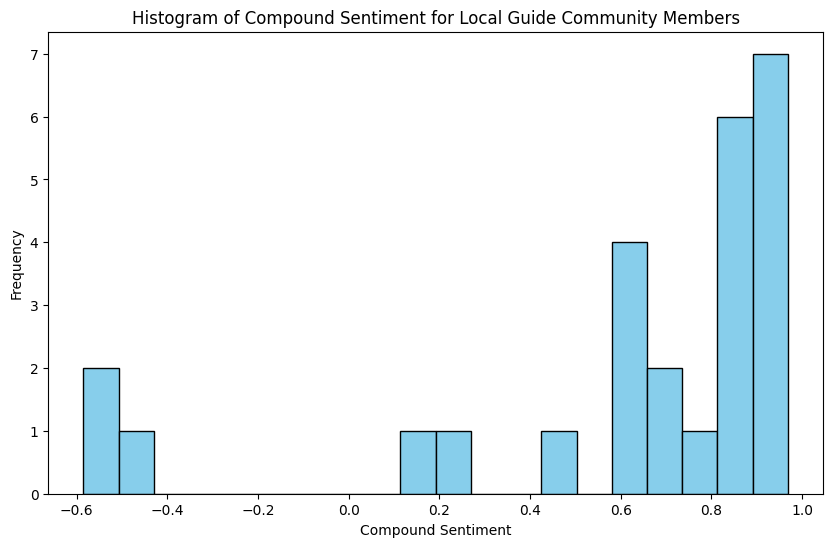

In [ ]:
# Plot historgram by Local Guide

local_guide_sentiments = df2[df2['Community Member'] == 'Local Guide']['compound_sentiment']

# Plotting a histogram for the sentiment scores of 'Local Guide'
plt.figure(figsize=(10, 6))
plt.hist(local_guide_sentiments, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Compound Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Compound Sentiment for Local Guide Community Members')
plt.show()


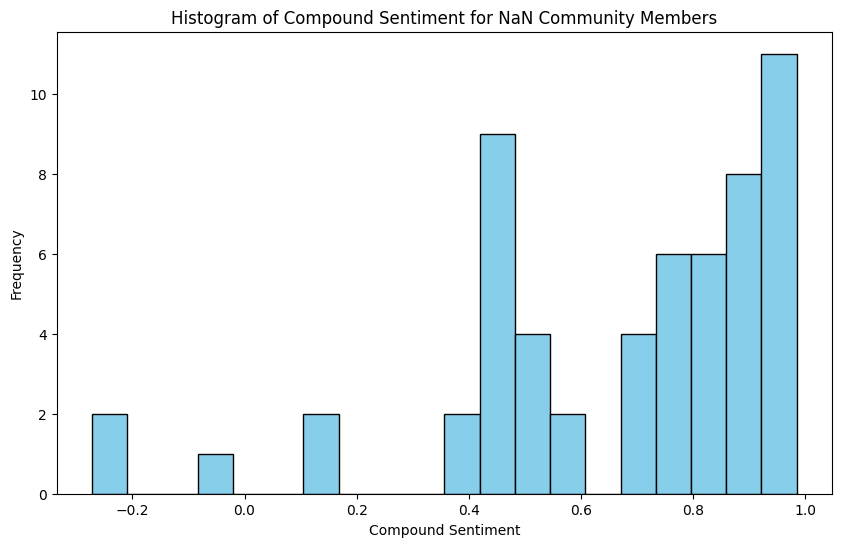

In [ ]:
# Plot histogram for NaN (Normal Members)

nan_sentiments = df2[df2['Community Member'].isna()]['compound_sentiment']

# Plotting a histogram for the sentiment scores of NaN community members
plt.figure(figsize=(10, 6))
plt.hist(nan_sentiments, bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Compound Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Compound Sentiment for NaN Community Members')
plt.show()

## Topic

Topics:
Topic 0: 0.044*"ice" + 0.040*"cream" + 0.019*"good" + 0.015*"great" + 0.014*"friendly" + 0.013*"service" + 0.012*"staff" + 0.012*"sesame" + 0.012*"black" + 0.008*"also"
Topic 1: 0.018*"friendly" + 0.018*"owner" + 0.017*"low" + 0.016*"good" + 0.014*"ice" + 0.014*"cream" + 0.013*"ube" + 0.013*"calories" + 0.011*"tried" + 0.011*"delicious"
Topic 2: 0.025*"low" + 0.025*"good" + 0.020*"gelato" + 0.017*"cream" + 0.017*"ice" + 0.015*"ube" + 0.013*"calorie" + 0.012*"friendly" + 0.012*"chocolate" + 0.011*"shop"


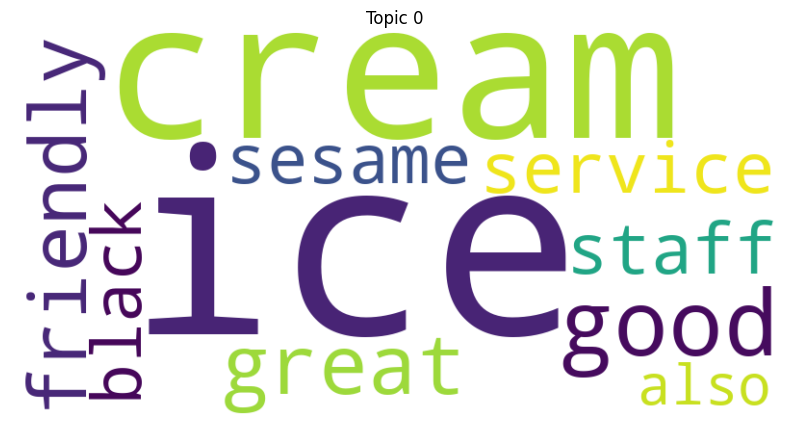

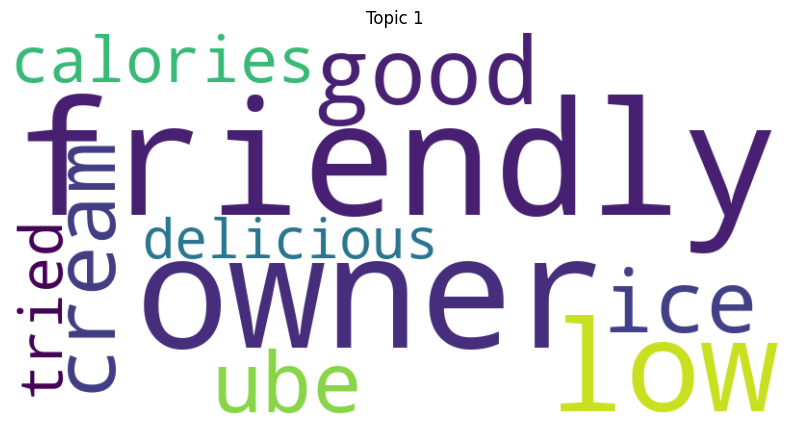

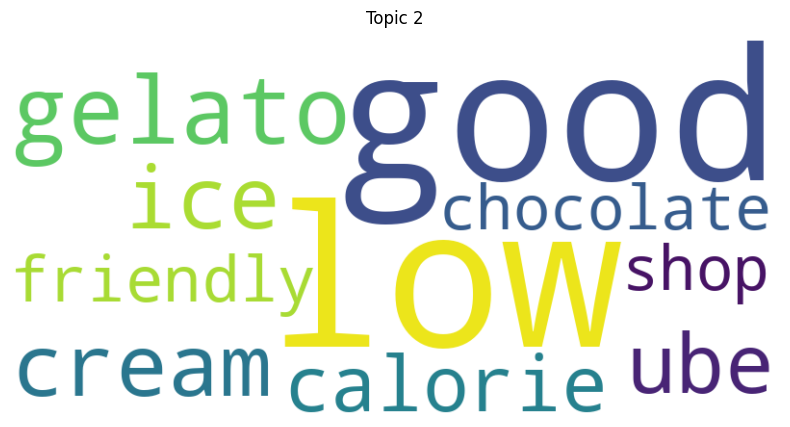

In [15]:
# 3 topic
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import numpy as np

# Preprocess the text (assuming df2 is your DataFrame)
texts = df2['comments_cleansed'].tolist()

# Tokenize and clean the text
tokenized_texts = [text.split() for text in texts]

# Create a dictionary and a corpus
dictionary = corpora.Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Build the LDA model
lda_model = LdaModel(corpus, num_topics=3, id2word=dictionary, passes=10)

# Display the topics
print("Topics:")
for topic_id, words in lda_model.print_topics():
    print(f"Topic {topic_id}: {words}")

# Visualize the topics
topics = lda_model.show_topics(formatted=False)
wordcloud = WordCloud(width=800, height=400, background_color='white')

for topic_id, words in topics:
    wordcloud.generate_from_frequencies(dict(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Topic {topic_id}')
    plt.axis('off')
    plt.show()

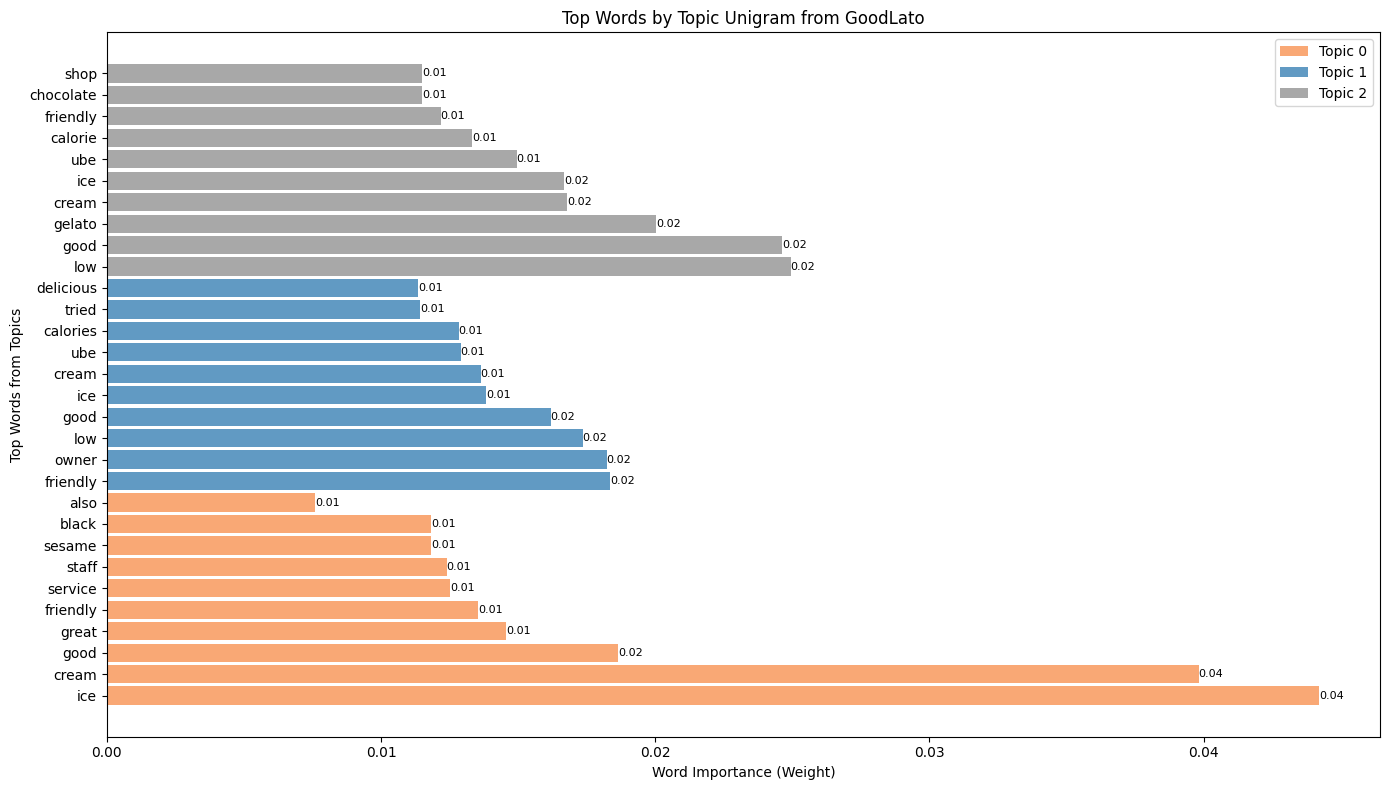

In [17]:
# Set up the plot dimensions and configurations
fig, ax = plt.subplots(figsize=(14, 8))
bar_width = 0.85  # Width of the bars

# Colors for different topics in shades of orange, blue, and grey
colors = ['#f9a875', '#619ac3', '#a8a8a8']  # Orange, Blue, Grey

# Number of top words to display for each topic
top_n = 10

# Extract the top words and their weights
top_words = {topic_id: lda_model.show_topic(topic_id, topn=top_n) for topic_id in range(lda_model.num_topics)}

# Store the words and their positions for labeling on the y-axis
tick_labels = []
positions = []

# Starting position for the first topic's bars
current_position = 0

# Iterate over each topic to plot the bars
for topic_id, words_data in top_words.items():
    words, weights = zip(*words_data)  # Unpack the words and their corresponding weights

    # Plot the bars for the current topic's words
    bars = ax.barh(current_position + np.arange(top_n), weights, bar_width, label=f'Topic {topic_id}', color=colors[topic_id % len(colors)])

    # Annotate the bars with the score
    for bar, score in zip(bars, weights):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{score:.2f}',
                va='center', ha='left', fontsize=8)

    # Add the words to the tick_labels list for the y-axis
    tick_labels.extend(words)

    # Update the positions for y-ticks
    positions.extend(current_position + np.arange(top_n))

    # Update the starting position for the next topic
    current_position += top_n

# Set the y-ticks to be in the middle of the bars for each topic
ax.set_yticks(positions)
ax.set_yticklabels(tick_labels)

# Set the labels and title of the plot
ax.set_xlabel('Word Importance (Weight)')
ax.set_ylabel('Top Words from Topics')
ax.set_title('Top Words by Topic Unigram from GoodLato')

# Add a legend
ax.legend()

# Show the plot
plt.tight_layout()  # Adjust the layout to fit everything
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(
<ipython-input-18-4a5e7273b293>:48: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(jsd_matrix, 'ward')


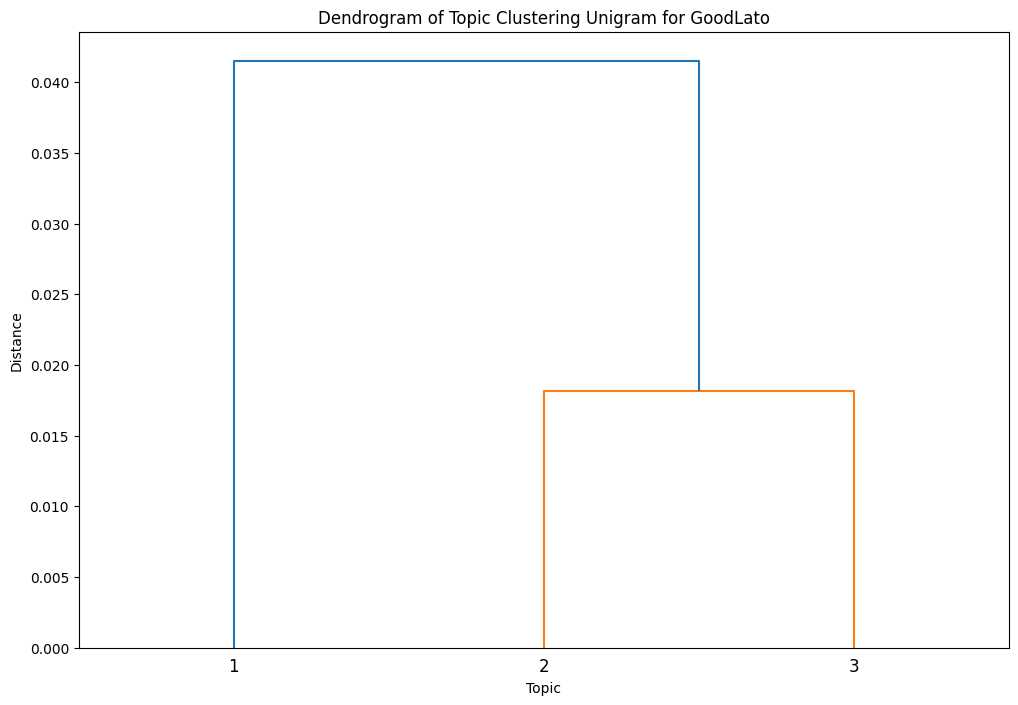

In [18]:
import numpy as np
from scipy.stats import entropy
from sklearn.manifold import MDS
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram

def jsd(p, q):
    # Calculate Jensen-Shannon Divergence
    p = np.asarray(p)
    q = np.asarray(q)
    m = 0.5 * (p + q)
    return 0.5 * (entropy(p, m) + entropy(q, m))

# Number of topics
num_topics = lda_model.num_topics

# Get the topic distribution for all topics
topic_distributions = [lda_model.show_topic(topicid, topn=len(dictionary)) for topicid in range(num_topics)]
topic_distributions_probs = [[word_probability for _, word_probability in topic_distribution] for topic_distribution in topic_distributions]

# Initialize an empty matrix
jsd_matrix = np.zeros((num_topics, num_topics))

# Populate the JSD matrix with the Jensen-Shannon Divergence values
for i in range(num_topics):
    for j in range(num_topics):
        # As JSD is symmetric, no need to calculate it twice
        if i < j:
            divergence = jsd(topic_distributions_probs[i], topic_distributions_probs[j])
            jsd_matrix[i, j] = divergence
            jsd_matrix[j, i] = divergence

# Now you have a JSD matrix defined, continue with MDS
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

# Perform MDS
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_coords = mds.fit_transform(jsd_matrix)  # Apply MDS to the JSD matrix

# Calculate scaled sizes
topic_sizes = [100 * lda_model.state.get_lambda()[i].sum() for i in range(num_topics)]

### Jenson-Shannon Divergence Matrix
from scipy.cluster.hierarchy import linkage, dendrogram

# Use the Jensen-Shannon divergence matrix to perform hierarchical clustering
Z = linkage(jsd_matrix, 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=range(1, num_topics+1))
plt.title('Dendrogram of Topic Clustering Unigram for GoodLato')
plt.xlabel('Topic')
plt.ylabel('Distance')
plt.show()

In [ ]:
count = 1
for negative in df2['comments_cleansed'][df2['sentiment'] == "negative"]:
#for negative in df2['compound_sentiment'][df2['sentiment'] == "negative"]:
  print(str(count) + ": " + str(negative))
  count += 1

1: happened pass chinatown saw google map shop sells low calorie low sugar high protein icecream
2: got 1scoop voucher chope didnt come high expectations ice cream really bad first werent many flavors choose even though midday flavors presented looked
3: bought promo chope felt bit disappointed see standard pint icecream little would like suggest weigh ice cream pack get
4: pistachio dark chocolate dark chocolate ok pistachio wasnt great
5: tried matcha flavour found bad low calorie treat texture definitely isnt creamy usual ice cream bad slightly chunky feel towards end also started tasted bit


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer

sentiment_groups = df2.groupby('sentiment')['comments_cleansed'].apply(lambda x: ' '.join(x)).to_dict()

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english', ngram_range=(1,1))

# Fit and transform the cleansed comments
tfidf_matrix = tfidf_vectorizer.fit_transform(df2['comments_cleansed'])

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Get the top n phrases for each review
top_n = 10
res_grp = {
    'positive': [],
    'neutral': [],
    'negative':[]
}

# Iterate through sentiment_groups and extract top phrases along with their scores
for sentiment, comments in sentiment_groups.items():
    # Fit and transform the merged comments for each sentiment group
    tfidf_matrix = tfidf_vectorizer.fit_transform([comments])
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Get the top phrases with their scores
    feature_index = tfidf_matrix[0, :].nonzero()[1]
    tfidf_scores = [(feature_names[i], tfidf_matrix[0, x]) for i, x in zip(feature_index, feature_index)]
    sorted_phrases_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:top_n]

    # Append the top phrases with scores to the corresponding sentiment group in res_grp
    res_grp[sentiment.lower()].append(sorted_phrases_scores)

# Display the top phrases with their scores for each sentiment group
for sentiment, top_phrases_scores_list in res_grp.items():
    print(f"Sentiment: {sentiment.capitalize()}")
    for i, phrases_scores in enumerate(top_phrases_scores_list):
        phrases_with_scores = ', '.join([f"{phrase} ({score:.4f})" for phrase, score in phrases_scores])
        print(f"Top Phrases for review {i+1}: {phrases_with_scores}")
    print('\n')

Sentiment: Positive
Top Phrases for review 1: ice (0.3758), good (0.3644), cream (0.3530), low (0.2505), friendly (0.2505), ube (0.2164), gelato (0.1822), owner (0.1822), flavours (0.1480), tried (0.1253)


Sentiment: Neutral
Top Phrases for review 1: stop (0.2673), bus (0.2673), location (0.2673), convenience (0.2673), boss (0.2673), lady (0.2673), young (0.2673), friendly (0.2673), calories (0.2673), low (0.2673)


Sentiment: Negative
Top Phrases for review 1: bad (0.2705), cream (0.2705), ice (0.2705), low (0.2705), chocolate (0.1803), dark (0.1803), pistachio (0.1803), bit (0.1803), flavors (0.1803), chope (0.1803)




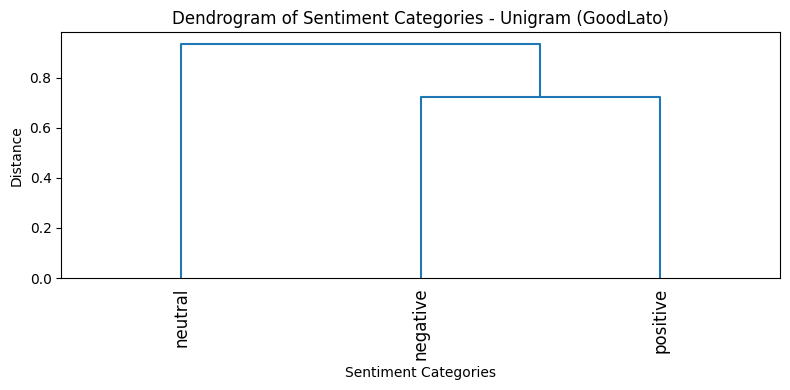

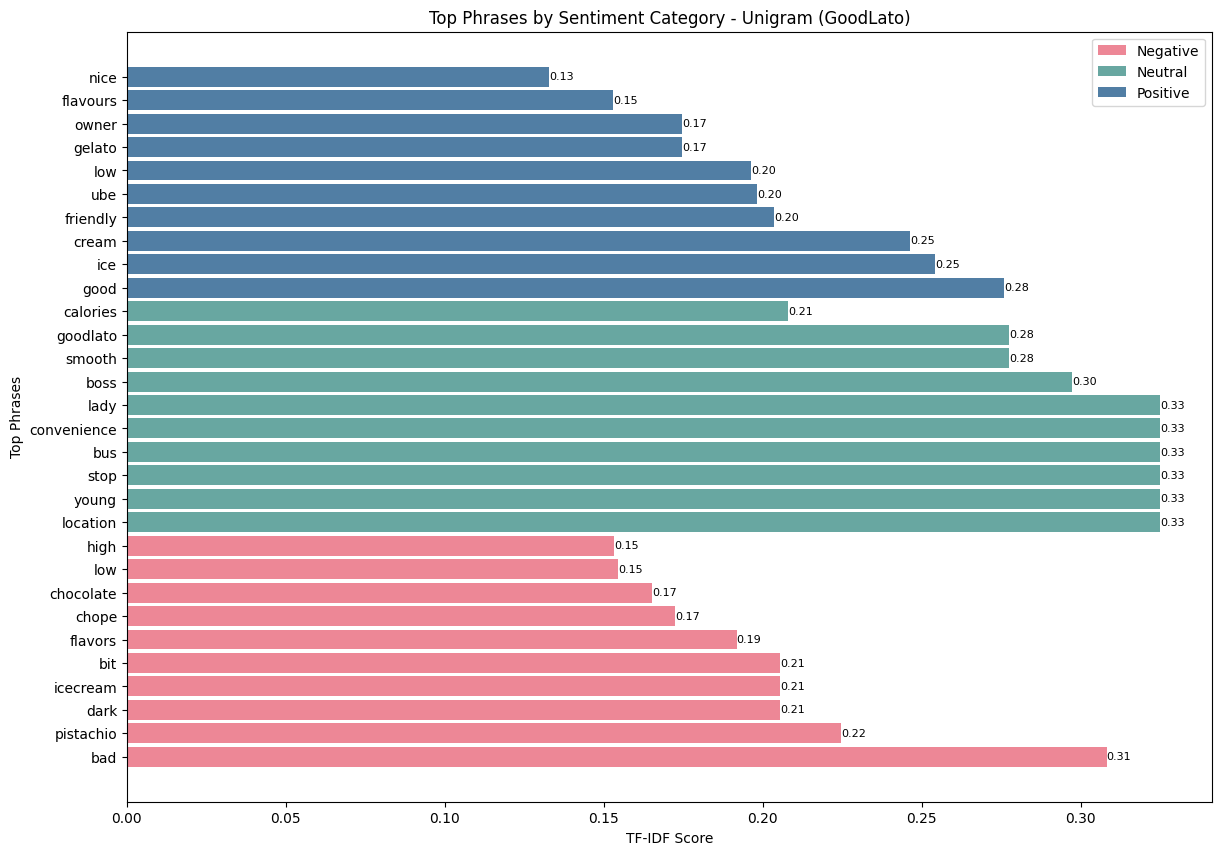

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
import pandas as pd

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english')

# Fit the TF-IDF vectorizer on all cleansed comments to get consistent feature space
tfidf_vectorizer.fit(df2['comments_cleansed'])

# Create an empty DataFrame to hold the feature space for each sentiment
tfidf_feature_df = pd.DataFrame(columns=tfidf_vectorizer.get_feature_names_out())

# Iterate through sentiment_groups and create a TF-IDF row for each
for sentiment, comments in sentiment_groups.items():
    # Transform the merged comments for each sentiment group
    tfidf_vector = tfidf_vectorizer.transform([comments])
    tfidf_feature_df.loc[sentiment] = tfidf_vector.toarray().flatten()

# Now tfidf_feature_df contains the TF-IDF scores for each sentiment's top phrases

# Calculate the pairwise distance matrix using cosine distance (1 - cosine similarity)
distance_matrix = pdist(tfidf_feature_df, 'cosine')

# Perform Hierarchical Clustering
Z = linkage(distance_matrix, 'ward')  # You can use other methods like 'average', 'complete', etc.

# Create the Dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=tfidf_feature_df.index, leaf_rotation=90, leaf_font_size=12)
plt.title('Dendrogram of Sentiment Categories - Unigram (GoodLato)')
plt.xlabel('Sentiment Categories')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Assuming 'tfidf_feature_df' is a DataFrame with sentiments as the index and words as columns
top_n = 10

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 10))

# Width of the bars
bar_width = 0.85

# Initialize the base position for the first bar set
base_pos = np.arange(top_n)

# Colors for different sentiments, switch the color for negative and neutral
colors = ['#ed8796', '#68a7a1', '#517ea4'] # Darker pastel blue for positive, green for neutral, pink for negative

# To store the tick labels
tick_labels = []

# To store the position of the bars for labeling
label_pos = []

# Iterate over each sentiment to plot the bars
for i, sentiment in enumerate(tfidf_feature_df.index):
    sorted_indices = np.argsort(tfidf_feature_df.loc[sentiment])[-top_n:][::-1]
    top_features = tfidf_feature_df.columns[sorted_indices]
    top_scores = tfidf_feature_df.loc[sentiment][sorted_indices]

    # Plotting each sentiment's top phrases
    bars = ax.barh(base_pos, top_scores, bar_width, label=sentiment.capitalize(), color=colors[i], edgecolor='none')

    # Annotate the bars with the score
    for bar, score in zip(bars, top_scores):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{score:.2f}',
                va='center', ha='left', fontsize=8)

    # Store the positions and labels
    tick_labels.extend(top_features)
    label_pos.extend(base_pos)

    # Update the base_pos for the next sentiment
    base_pos = base_pos + top_n

# Set the y-tick labels
ax.set_yticks(label_pos)
ax.set_yticklabels(tick_labels)

# Set chart title and labels
ax.set_title('Top Phrases by Sentiment Category - Unigram (GoodLato)')
ax.set_xlabel('TF-IDF Score')
ax.set_ylabel('Top Phrases')

# Add legend
ax.legend()

# Show plot
plt.show()

In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Your DataFrame 'df2' and sentiment groups code assumed to be defined here

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english', ngram_range=(2,2))

top_n = 10
res_grp = {
    'positive': [],
    'neutral': [],
    'negative':[]
}

# Iterate through sentiment_groups and extract top phrases
for sentiment, comments in sentiment_groups.items():
    # Fit the vectorizer with the merged comments for each sentiment group
    tfidf_vectorizer.fit([comments])
    # Transform the comments
    tfidf_matrix = tfidf_vectorizer.transform([comments])

    # Now you can safely get feature names
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Get the top phrases
    feature_index = tfidf_matrix[0, :].nonzero()[1]
    tfidf_scores = zip(feature_index, [tfidf_matrix[0, x] for x in feature_index])

    # Get sorted scores and feature names
    sorted_items = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:top_n]
    top_phrases = [(feature_names[i], score) for i, score in sorted_items]

    # Append the top phrases to the corresponding sentiment group in res_grp
    res_grp[sentiment].extend(top_phrases)

# Display the top phrases for each sentiment group
for sentiment, top_phrases in res_grp.items():
    print(f"Sentiment: {sentiment.capitalize()}")
    for phrase, score in top_phrases:
        print(f"{phrase}: {score:.3f}")
    print('\n')


Sentiment: Positive
ice cream: 0.641
low calorie: 0.186
lychee rose: 0.145
low calories: 0.145
ube flavour: 0.103
high protein: 0.103
friendly staff: 0.103
earl grey: 0.103
cream good: 0.103
clarke quay: 0.103


Sentiment: Neutral
young lady: 0.277
smooth low: 0.277
low calories: 0.277
location bus: 0.277
lady boss: 0.277
ice cream: 0.277
goodlato ice: 0.277
friendly young: 0.277
cream smooth: 0.277
convenience location: 0.277


Sentiment: Negative
ice cream: 0.316
low calorie: 0.211
dark chocolate: 0.211
werent flavors: 0.105
weigh ice: 0.105
wasnt great: 0.105
voucher chope: 0.105
usual ice: 0.105
tried matcha: 0.105
treat texture: 0.105




<ipython-input-24-4f72f505a09a>:26: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, 'ward')


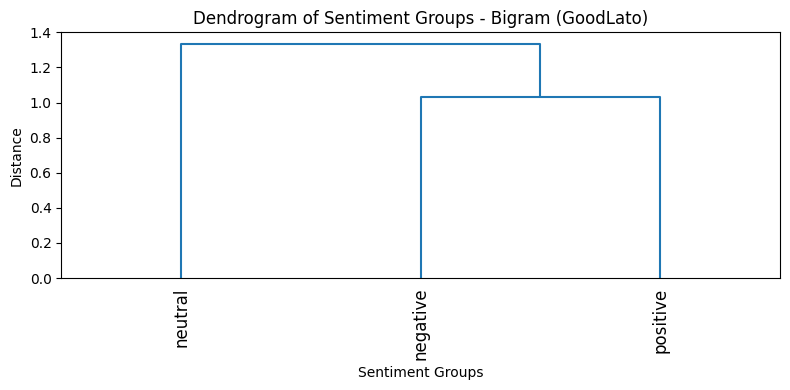

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming df2 is your DataFrame and it contains the 'sentiment' and 'cleansed_comments' columns

# Create the TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english')

# Fit the TF-IDF vectorizer on all cleansed comments to get consistent feature space
tfidf_vectorizer.fit(df2['comments_cleansed'])

# Transform the merged comments for each sentiment group
tfidf_matrices = [tfidf_vectorizer.transform([comments]) for comments in sentiment_groups.values()]

# Compute a distance matrix between the TF-IDF vectors of each sentiment group
from sklearn.metrics.pairwise import cosine_distances

# Stack all group vectors into a single matrix for distance computation
tfidf_matrix_stack = np.vstack([tfidf_matrix.toarray() for tfidf_matrix in tfidf_matrices])

# Compute cosine distances (1 - cosine_similarity) between TF-IDF vectors
distance_matrix = cosine_distances(tfidf_matrix_stack)

# Perform hierarchical clustering
Z = linkage(distance_matrix, 'ward')

# Plot the dendrogram
plt.figure(figsize=(8, 4))
dendrogram(Z, labels=list(sentiment_groups.keys()), leaf_rotation=90)
plt.title('Dendrogram of Sentiment Groups - Bigram (GoodLato)')
plt.xlabel('Sentiment Groups')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

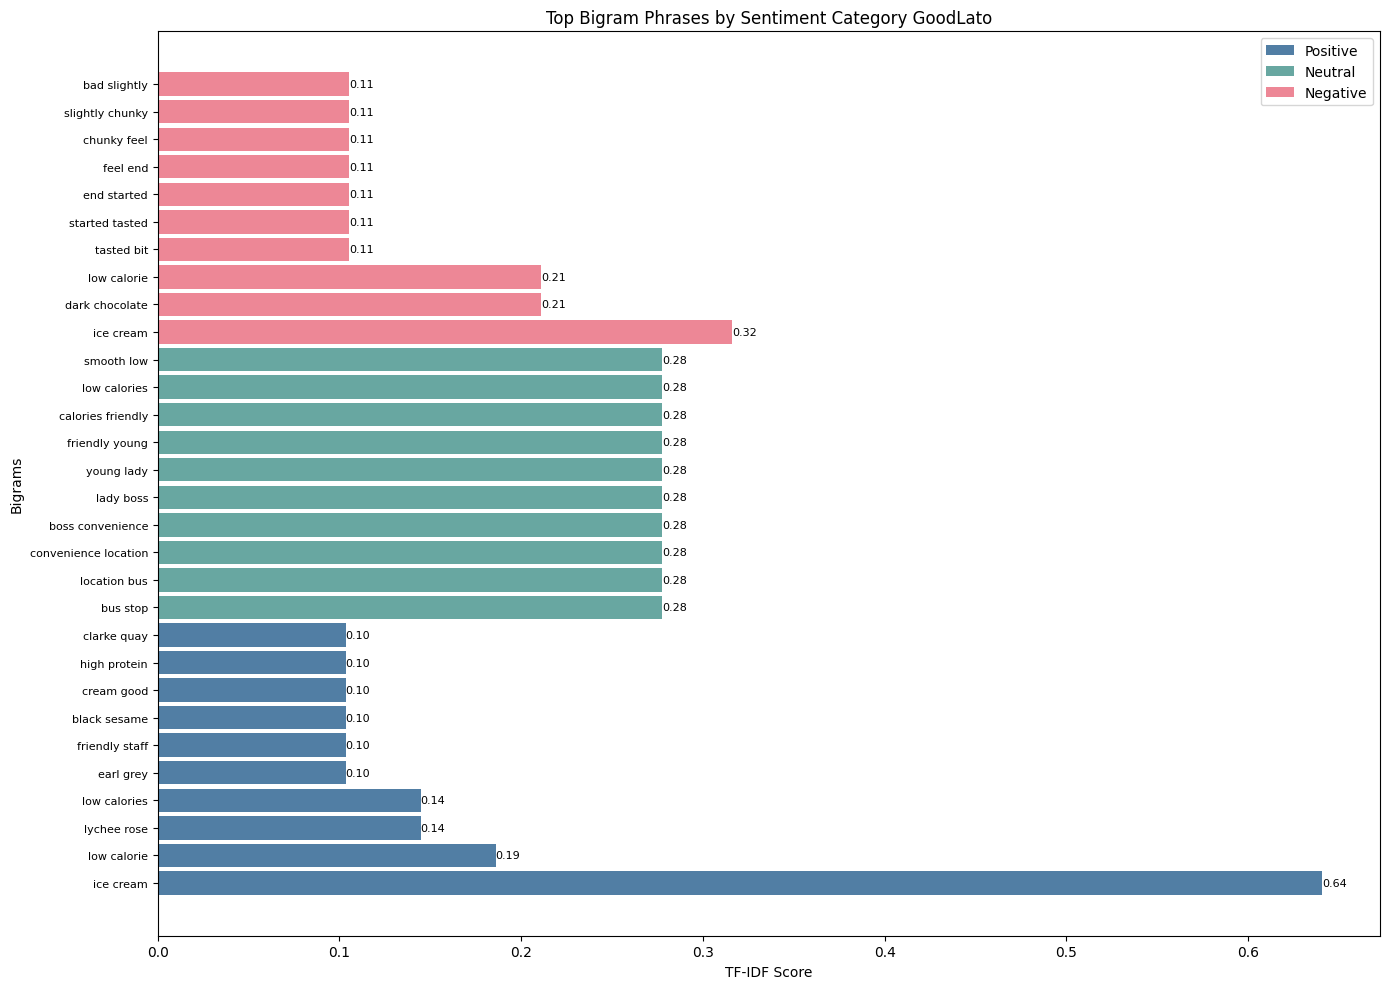

In [26]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Group by 'sentiment' and join the cleansed comments
sentiment_groups = df2.groupby('sentiment')['comments_cleansed'].apply(lambda x: ' '.join(x)).to_dict()

# Create the TF-IDF vectorizer with bigrams
tfidf_vectorizer = TfidfVectorizer(max_df=1.0, min_df=1, max_features=1000, stop_words='english', ngram_range=(2, 2))

# DataFrame to hold the top phrases and their scores
df_top_phrases = pd.DataFrame()

# Get the top n bigrams for each sentiment
top_n = 10

# Iterate through sentiment_groups and extract top bigrams
for sentiment, comments in sentiment_groups.items():
    # Fit and transform the merged comments for each sentiment group
    tfidf_matrix = tfidf_vectorizer.fit_transform([comments])
    feature_names = tfidf_vectorizer.get_feature_names_out()

    # Get the top bigrams and their scores
    feature_index = tfidf_matrix[0, :].nonzero()[1]
    tfidf_scores = [(feature_names[i], tfidf_matrix[0, x]) for i, x in zip(feature_index, feature_index)]

    # Sort by score and get top n
    top_phrases_scores = sorted(tfidf_scores, key=lambda x: x[1], reverse=True)[:top_n]

    # Append to DataFrame
    df_top_phrases[sentiment.capitalize() + ' Word'] = [phrase for phrase, score in top_phrases_scores]
    df_top_phrases[sentiment.capitalize() + ' Score'] = [score for phrase, score in top_phrases_scores]

# Transpose the DataFrame so each sentiment category is a column
df_top_phrases_transposed = df_top_phrases.T


# Set the number of top phrases (bigrams) for each sentiment
top_n = 10

# Create a figure and a set of subplots
fig, ax = plt.subplots(figsize=(14, 10))

# Colors for different sentiments
colors = ['#517ea4', '#68a7a1', '#ed8796']  # Darker pastel blue, green, pink

# Iterate over each sentiment to plot the bars
bigram_labels = []  # This will store all bigram labels for y-ticks
current_position = 0  # Initialize the position for the first sentiment's bars

for i, sentiment in enumerate(['Positive', 'Neutral', 'Negative']):
    # Select the bigrams and their scores for the current sentiment
    bigrams = df_top_phrases[sentiment + ' Word']
    scores = df_top_phrases[sentiment + ' Score']
    y_pos = np.arange(current_position, current_position + len(bigrams))

    # Plot the bars for the current sentiment's bigrams
    bars = ax.barh(y_pos, scores, height=0.85, label=sentiment, color=colors[i])

    # Annotate the bars with the score
    for bar, score in zip(bars, scores):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{score:.2f}',
                va='center', ha='left', fontsize=8)

    # Update the bigram labels list and the current position
    bigram_labels.extend(bigrams)
    current_position += len(bigrams)

# Set the y-tick labels
ax.set_yticks(np.arange(top_n * 3))  # Total number of bars is top_n times the number of sentiments
ax.set_yticklabels(bigram_labels, fontsize=8)

# Set the labels and title of the plot
ax.set_xlabel('TF-IDF Score')
ax.set_ylabel('Bigrams')
ax.set_title('Top Bigram Phrases by Sentiment Category GoodLato')

# Add a legend
ax.legend()

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

### Bigram

In [27]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.util import ngrams
import string

# Define a function for text preprocessing with bigrams or trigrams
def preprocess_text_with_ngrams(text, n=2):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove punctuation and numbers
    tokens = [word.lower() for word in tokens if word.isalpha()]

    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    # Stemming
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    # Generate n-grams (bigrams or trigrams)
    n_grams = ngrams(tokens, n)
    n_grams = [' '.join(gram) for gram in n_grams]

    return ' '.join(n_grams)

# Apply preprocessing with bigrams or trigrams to the 'cleansed_comments' column
df2['preprocessed_comments_ngrams'] = df2['comments_cleansed'].apply(lambda x: preprocess_text_with_ngrams(x, n=2))  # for bigrams
# or
df2['preprocessed_comments_ngrams'] = df2['comments_cleansed'].apply(lambda x: preprocess_text_with_ngrams(x, n=3))  # for trigrams

<ipython-input-27-470723834e9b>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['preprocessed_comments_ngrams'] = df2['comments_cleansed'].apply(lambda x: preprocess_text_with_ngrams(x, n=2))  # for bigrams
<ipython-input-27-470723834e9b>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['preprocessed_comments_ngrams'] = df2['comments_cleansed'].apply(lambda x: preprocess_text_with_ngrams(x, n=3))  # for trigrams


In [28]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance for bigrams or trigrams
vectorizer_ngrams = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(2, 2))  # for bigrams
# or
#vectorizer_ngrams = CountVectorizer(max_df=0.95, min_df=2, stop_words='english', ngram_range=(3, 3))  # for trigrams

# Create the document-term matrix with bigrams or trigrams
dtm_ngrams = vectorizer_ngrams.fit_transform(df2['preprocessed_comments_ngrams'])

In [29]:
from sklearn.decomposition import LatentDirichletAllocation

# Set the number of topics
num_topics = 3  # Adjust as needed

# Create the LDA model for bigrams or trigrams
lda_ngrams = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit the LDA model to the document-term matrix with bigrams or trigrams
lda_ngrams.fit(dtm_ngrams)

# Display the topics and associated words for bigrams or trigrams
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(", ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print()

# Set the number of top words for each topic
no_top_words = 10  # Adjust as needed

# Display the topics and associated words for bigrams or trigrams
feature_names_ngrams = vectorizer_ngrams.get_feature_names_out()
display_topics(lda_ngrams, feature_names_ngrams, no_top_words)

Topic 1:
low calori, clark quay, calori low, low sugar, earl grey, sugar high, near clark, quay clark, gelato gelato, good gelato

Topic 2:
ice cream, cream ice, low calori, cream good, owner friendli, dark chocol, friendli owner, tast ice, calori low, chocol dark

Topic 3:
lyche rose, ice cream, black sesam, ube flavour, sesam black, realli friendli, flavour ube, taro lyche, rose lyche, cream ice



<ipython-input-30-1b9a81b37f93>:18: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(dist_matrix, 'average')  # 'average' linkage can be used or 'ward'


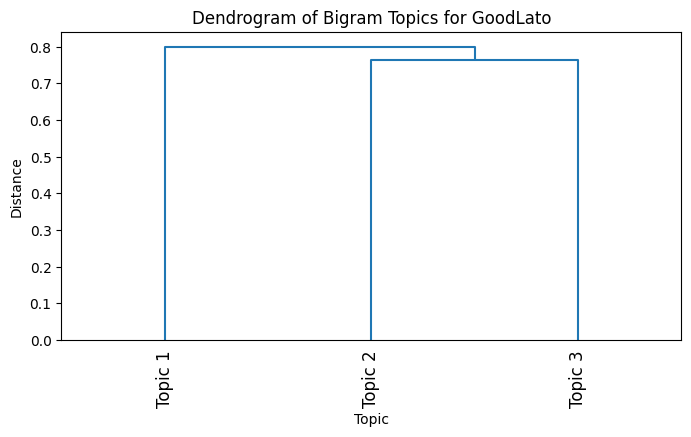

In [30]:
from scipy.spatial.distance import jensenshannon
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Assuming you have the LDA model fitted with bigrams `lda_ngrams`
# and the feature names from the bigrams vectorizer `feature_names_ngrams`

# 1. Compute Topic Distribution
topic_word_distributions = lda_ngrams.components_ / lda_ngrams.components_.sum(axis=1)[:, np.newaxis]

# 2. Calculate Distance Matrix
dist_matrix = np.zeros((num_topics, num_topics))
for i in range(num_topics):
    for j in range(num_topics):
        dist_matrix[i, j] = jensenshannon(topic_word_distributions[i], topic_word_distributions[j])

# 3. Perform Hierarchical Clustering
Z = linkage(dist_matrix, 'average')  # 'average' linkage can be used or 'ward'

# 4. Create the Dendrogram
plt.figure(figsize=(8, 4))
dendrogram(
    Z,
    labels=[f'Topic {i+1}' for i in range(num_topics)],
    leaf_rotation=90,
)
plt.title('Dendrogram of Bigram Topics for GoodLato')
plt.xlabel('Topic')
plt.ylabel('Distance')
plt.show()

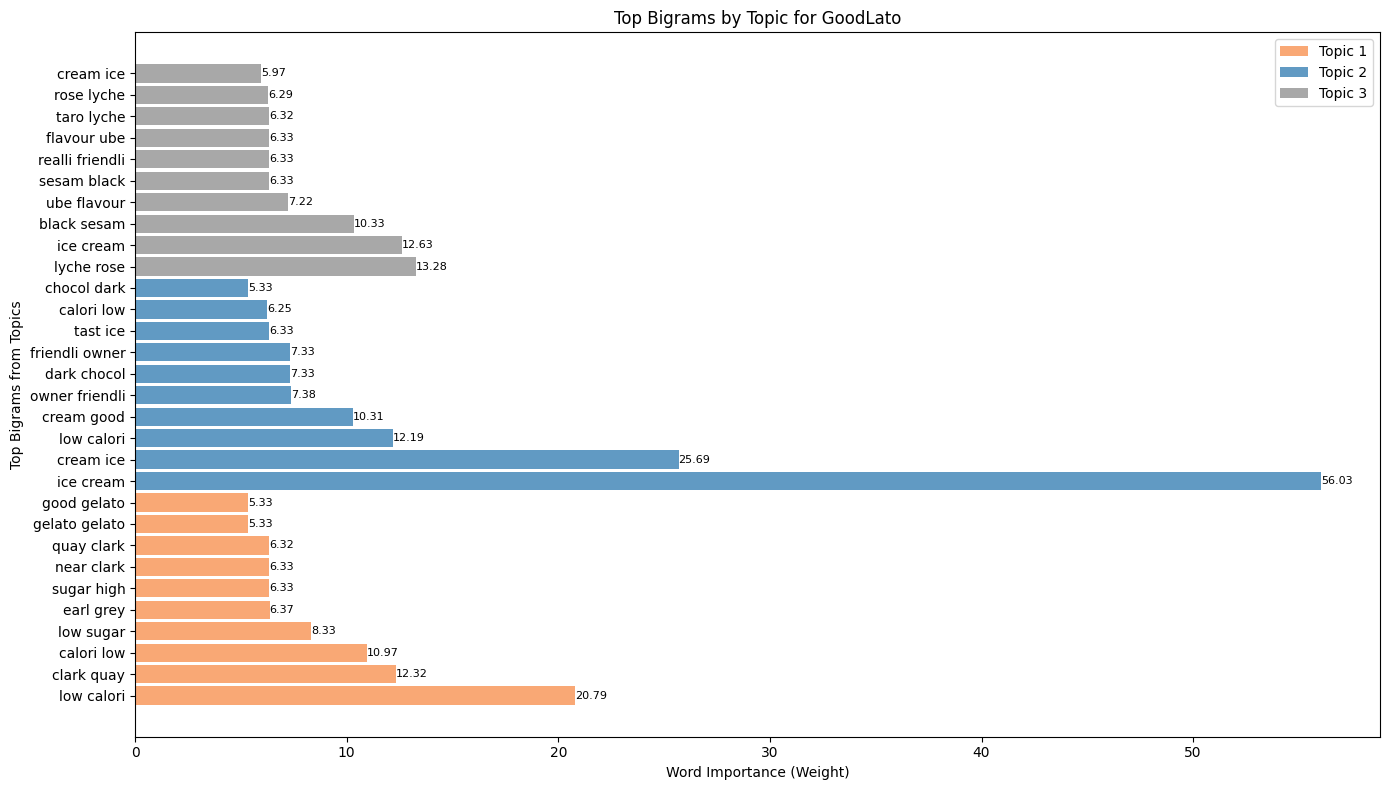

In [31]:
# Extract feature names (bigrams) from the vectorizer
feature_names_ngrams = vectorizer_ngrams.get_feature_names_out()

no_top_words = 10
# Create a DataFrame to hold the scored words for each topic
df_topics_ngrams = pd.DataFrame()

# Extract the top words and their scores for each topic
for topic_idx, topic_components in enumerate(lda_ngrams.components_):
    # Sort the indices of the topic components in descending order of weights
    top_indices = topic_components.argsort()[::-1][:no_top_words]

    # Get the top words and their corresponding weights
    top_features = [feature_names_ngrams[i] for i in top_indices]
    top_weights = topic_components[top_indices]

    # Add the top words and weights to the DataFrame
    df_topics_ngrams[f'Topic {topic_idx} Words'] = top_features
    df_topics_ngrams[f'Topic {topic_idx} Weights'] = top_weights

# Transpose the DataFrame to have topics as columns
df_topics_ngrams = df_topics_ngrams.T

fig, ax = plt.subplots(figsize=(14, 8))

# Width of the bars
bar_width = 0.85

# Colors for different topics, assuming three topics
colors = ['#f9a875', '#619ac3', '#a8a8a8']  # Orange, Blue, Grey

# Store the words and their positions for labeling on the y-axis
tick_labels = []
positions = []

# Starting position for the first topic's bars
current_position = 0

# Iterate over the topics to plot the bars
for topic_idx in range(lda_ngrams.n_components):
    # Get the top words and weights for the topic
    top_features = df_topics_ngrams.loc[f'Topic {topic_idx} Words'].values
    top_weights = df_topics_ngrams.loc[f'Topic {topic_idx} Weights'].values

    # Plotting the bars for the current topic's bigrams
    bars = ax.barh(current_position + np.arange(no_top_words), top_weights, height=bar_width, label=f'Topic {topic_idx + 1}', color=colors[topic_idx % len(colors)])

    # Annotating the bars with the score
    for bar, weight in zip(bars, top_weights):
        ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, f'{weight:.2f}', va='center', ha='left', fontsize=8)

    # Add the words to the tick_labels list for the y-axis
    tick_labels.extend(top_features)

    # Update the positions for y-ticks
    positions.extend(current_position + np.arange(no_top_words))

    # Update the starting position for the next topic
    current_position += no_top_words

# Set the y-ticks to be in the middle of the bars for each topic
ax.set_yticks(positions)
ax.set_yticklabels(tick_labels)

# Set the labels and title of the plot
ax.set_xlabel('Word Importance (Weight)')
ax.set_ylabel('Top Bigrams from Topics')
ax.set_title('Top Bigrams by Topic for GoodLato')

# Add a legend to identify the topics
ax.legend()

# Show the plot with a tight layout
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation

# Assume dtm_ngrams and vectorizer_ngrams are defined and fitted to your data

# Set the number of topics
num_topics = 3  # Adjust as needed

# Create the LDA model for bigrams or trigrams
lda_ngrams = LatentDirichletAllocation(n_components=num_topics, random_state=42)

# Fit the LDA model to the document-term matrix with bigrams or trigrams
lda_ngrams.fit(dtm_ngrams)

# Display the topics and associated words along with their scores for bigrams or trigrams
def display_topics_with_scores(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        top_features_ind = topic.argsort()[:-no_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        top_weights = topic[top_features_ind]

        print(f"Topic {topic_idx + 1}:")
        for feature, weight in zip(top_features, top_weights):
            print(f"{feature} {weight:.3f}")
        print()

# Set the number of top words for each topic
no_top_words = 10  # Adjust as needed

# Get the feature names (bigrams or trigrams)
feature_names_ngrams = vectorizer_ngrams.get_feature_names_out()

# Display the topics and associated words and scores for bigrams or trigrams
display_topics_with_scores(lda_ngrams, feature_names_ngrams, no_top_words)


Topic 1:
low calori 20.793
clark quay 12.322
calori low 10.965
low sugar 8.327
earl grey 6.366
sugar high 6.333
near clark 6.326
quay clark 6.322
gelato gelato 5.333
good gelato 5.333

Topic 2:
ice cream 56.030
cream ice 25.686
low calori 12.186
cream good 10.309
owner friendli 7.381
dark chocol 7.333
friendli owner 7.333
tast ice 6.333
calori low 6.247
chocol dark 5.333

Topic 3:
lyche rose 13.284
ice cream 12.629
black sesam 10.333
ube flavour 7.217
sesam black 6.333
realli friendli 6.333
flavour ube 6.329
taro lyche 6.323
rose lyche 6.292
cream ice 5.972



## Wordcloud

In [ ]:
from wordcloud import WordCloud

all_comments = ' '.join(df2['comments_cleansed'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_comments)

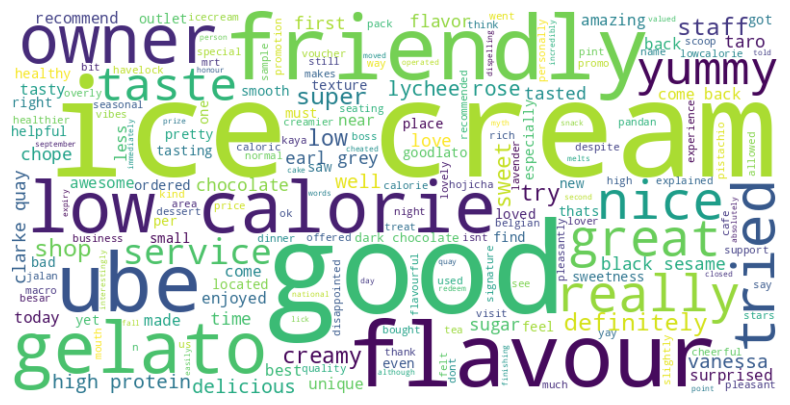

In [ ]:
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()